<a href="https://colab.research.google.com/github/sugatoray/CodeSnippets/blob/master/src/Notebooks/matplotlib_to_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting `matlotlib` figures to `plotly`

The [plotly documentation][#plotly-mpl_to_plotly] shows that there is a convenience function [`plotly.tools.mpl_to_plotly()`][#plotly-mpl_to_plotly] that can convert a `matplotlib` figure into a `plotly` figure.

[#plotly-mpl_to_plotly]: https://plotly.github.io/plotly.py-docs/generated/plotly.html#plotly.tools.mpl_to_plotly

```python
plotly.tools.mpl_to_plotly(fig, resize=False, strip_style=False, verbose=False)
```

An example: 



Here we will test this with a few types of `matplotlib` charts.

## Import Libraries ⚙️

In [1]:
#@title
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import os

# plotly specific import
from plotly.tools import mpl_to_plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as po

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina' 
plt.style.use('seaborn-white')

In [2]:
V1 = 6.88
V2 = 6.32
k = 10**3
mu = k**2
alpha = 21.2 * k
dt = 8 * (1/mu)
dV = np.abs(V1 - V2)

V_mean = V2 - dV / (np.exp(alpha * dt) - 1)
V_mean


3.290202332596102

### Check Versions ⚙️

In [85]:
#@title Show Versions ☑️
def show_versions():
    import matplotlib as mpl
    import plotly as py
    s = '{name}: {version}'
    libs = [mpl, pd, sns, py, np, os]
    for obj in libs:
        if hasattr(obj, '__version__') and hasattr(obj, '__name__'):
            print(s.format(
                name = obj.__name__, 
                version = obj.__version__
            ))

show_versions()

matplotlib: 3.2.2
pandas: 1.1.2
seaborn: 0.11.0
plotly: 4.4.1
numpy: 1.18.5


## Simple Plot 📁

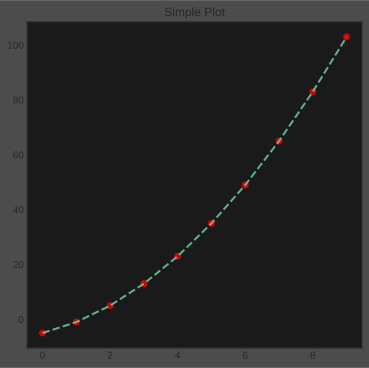

In [13]:
#@title
x = np.arange(10)
y = x**2 + 3*x - 5

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig.patch.set_facecolor((0.3, 0.3, 0.3))
plt.sca(ax)
plt.plot(x, y, color='#7EEEC0', linestyle='--', linewidth=2, alpha=0.7)
plt.scatter(x, y, color='red', marker='o', alpha=0.7)
ax.set_facecolor((0.1, 0.1, 0.1))
plt.title('Simple Plot')
plt.show()

In [29]:
plfig = mpl_to_plotly(fig=fig)
# WARNING: As of now you must use a 
#   matplotlib version < 3.0.3
#   to use mpl_to_plotly().
# NOTE:
# plfig is a plotly figure object
# plfig.show() will show the figure
# plfig2 = go.Figure(plfig) creates a new plotly figure object

In [19]:
plfig.show()

## Clustermap 📁

![clustermap-icon][#clustermap-icon]

[#clustermap-icon]: https://python-graph-gallery.com/wp-content/uploads/405_Dendro_and_heatmap_and_rowcolor-e1507701952876.png

Clustermaps could be made with `seaborn.clustermap()`. Here are a few examples.

- [example-001][#clustermap-example-001]: *#405 Dendrogram with heatmap and coloured leaves*.
- [example-002][#clustermap-example-002]: *#404 Dendrogram with heat map*.
- [A detailed walkthrough on `seaborn.clustermap`][#clustermap-example-003]: *Hierarchically-clustered Heatmap in Python with Seaborn Clustermap*.

[seaborn-clustermap-docs]: https://seaborn.pydata.org/generated/seaborn.clustermap.html
[#clustermap-example-001]: https://python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves/
[#clustermap-example-002]: https://python-graph-gallery.com/404-dendrogram-with-heat-map/
[#clustermap-example-003]: https://datavizpyr.com/hierarchically-clustered-heatmap-with-seaborn-in-python/ 

✴️ For _clustermap with **R**_ see [this stackoverflow thread][#stackoverflow-clustermap-R].

[#stackoverflow-clustermap-R]: https://stackoverflow.com/questions/53014323/plotting-a-heatmap-with-categorical-data

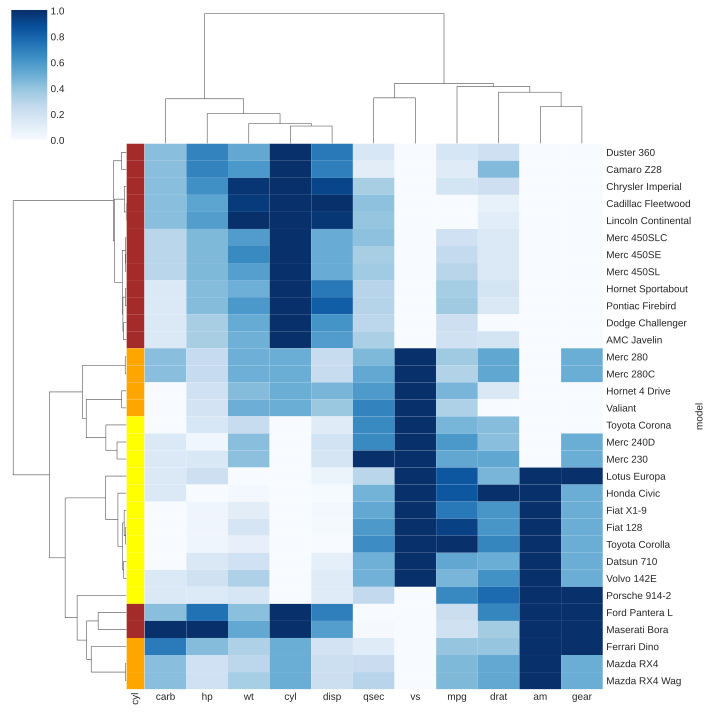

In [30]:
#@title
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
df
 
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
row_colors = df.cyl.map(my_palette)
 
# plot
fig = sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)

### The `mpl_to_plotly()` function DOES NOT WORK for the `sns.clustermap` 🔥🔥🔥

**Note**: `mpl_to_plotly(fig=fig)` DOES NOT work for `sns.clustermap` 🔥🔥🔥

In [32]:
# mpl_to_plotly(fig=fig)

## Treemap 📁

[![treemap-image][#treemap-icon]][#treemap-icon]

[#treemap-icon]: https://python-graph-gallery.com/wp-content/uploads/TreeBig-300x300.png

- [examples][#treemap-example]: *TREEMAP*
- [example-001][#treemap-example-001]: *we are using this one below*.

[#treemap-example-001]: https://python-graph-gallery.com/201-control-the-color-of-treemap/
[#treemap-example]: https://python-graph-gallery.com/treemap/

In [34]:
! pip install -U -q squarify # for treemap

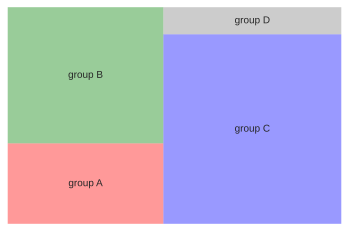

In [81]:
#@title
#libraries
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
 
# Change color
fig = squarify.plot(
    sizes=[13,22,35,5], 
    label=["group A", "group B", "group C", "group D"], 
    color=["red","green","blue", "grey"], 
    alpha=.4 
)
plt.axis('off')
plt.show()

### Cannot use `mpl_to_plotly()` on `squarify` figure object 

In [83]:
# mpl_to_plotly(fig = fig)

## Heatmap 📁

- [seaborn.heatmap docs][#seaborn-heatmap-docs]
- [examples]: https://python-graph-gallery.com/?s=heatmap

[#seaborn-heatmap-docs]: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [37]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

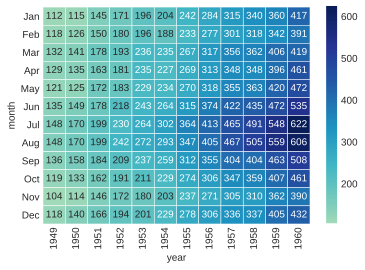

In [42]:
#@title
ax = sns.heatmap(
    data = flights, 
    annot = True, 
    fmt = "d", 
    linewidths = .5, 
    linecolor = 'white', 
    square = False, 
    cbar = True, 
    cmap = "YlGnBu", 
    center = flights.loc["Jan", 1955]
)

### The `mpl_to_plotly()` function does not convert the `sns.heatmap` properly 🔥🔥🔥

In [45]:
mpl_to_plotly(fig = ax.figure)

### Heatmaps using Plotly

Source: https://plotly.com/python/heatmaps/

Look for heading: *Heatmap with Categorical Axis Labels*

In [75]:
#@title
fig = go.Figure(
    data=go.Heatmap(
        z=[[1, None, 30, 50, 1], 
            [20, 1, 60, 80, 30], 
            [30, 60, 1, -10, 20]],
        x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        y=['Morning', 'Afternoon', 'Evening'],
        hoverongaps = False, # this toggles hovertext for gaps (None values)
        type = 'heatmap',
        colorscale = 'Viridis', # YlGnBu, Viridis, Inferno ; ALSO, 'Viridis' == px.colors.sequential.Viridis      
    ),
    layout_title_text="A Heatmap",
    #layout_height = 100, 
    #layout_width = 500,
    
)
fig.show()

### How to save the figure as `html`

Source: [stackoverflow][#stackoverflow]

[#stackoverflow]: https://stackoverflow.com/questions/59815797/plotly-how-to-save-plotly-express-plot-into-a-html-or-static-image-file

```python
import plotly.graph_objects as fo
# NOTE: fig is a go.Figure() object
## Option-1
# fig.to_html() --> write text to an html file
with open('test_plotly.html', 'w') as f:
    f.write(fig.to_html())

## Option-2

# Use plotly.offline.plot(fig, filename) to create the html file
# po == plotly.offline
import plotly.offline as po
po.plot(fig, filename='test_plotly-offline-html.html')
```

In [78]:
# fig.to_html() --> write text to an html file
with open('test_plotly.html', 'w') as f:
    f.write(fig.to_html())

In [80]:
# Use plotly.offline.plot(fig, filename) to create the html file
# po == plotly.offline
po.plot(fig, filename='test_plotly-offline-html.html')

'test_plotly-offline-html.html'

### Problem with saving plotly figures with higher `dpi` 🔥🔥🔥

Currently this is not supported. You need to manually increase the `height` and `width` parameters, before saving the file. But that also comes with strings attached: the labels will be very small compared to the image size. So, you will have to adjust the text size as well (manually).

Source: https://community.plotly.com/t/set-dpi-for-static-png-export/1171/2

```python
fig.layout.height = 500
fig.layout.width = 1200
fig.show()
```

## Others